In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:

data = np.array(df)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [14]:
data = np.array(df)
data.shape

(42000, 785)

In [15]:
def init_params():
    # Initialize weights W1, W2 with random values between -0.5 and 0.5
    W1 = np.random.rand(10, 784) - 0.5  # 10 neurons in the first layer, 784 features
    W2 = np.random.rand(10, 10) - 0.5   # 10 neurons in the second layer, 10 outputs (digits 0-9)

    # Initialize biases b1, b2 with random values between -0.5 and 0.5
    b1 = np.random.rand(10, 1) - 0.5    # Bias for the first layer
    b2 = np.random.rand(10, 1) - 0.5    # Bias for the second layer

    return W1, b1, W2, b2

def ReLU(Z):
    # ReLU activation function: returns max(0, Z)
    return np.maximum(Z, 0)

def softmax(Z):
    # Softmax activation function for the output layer
    A = np.exp(Z) / np.sum(np.exp(Z))  # Calculate softmax probabilities
    return A

def forward_prop(W1, b1, W2, b2, X):
    # Perform forward propagation through the network
    Z1 = W1.dot(X) + b1                 # Calculate activation of the first layer
    A1 = ReLU(Z1)                       # Apply ReLU activation to the first layer
    Z2 = W2.dot(A1) + b2                # Calculate activation of the second layer
    A2 = softmax(Z2)                    # Apply softmax activation to the second layer (output)
    return Z1, A1, Z2, A2               # Return activations and outputs

def ReLU_deriv(Z):
    # Derivative of ReLU activation function
    return Z > 0                        # Returns 1 if Z > 0, otherwise 0

def one_hot(Y):
    # Convert integer labels Y into one-hot encoded vectors
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1  # Set the corresponding index to 1 for each label
    one_hot_Y = one_hot_Y.T              # Transpose to match the output shape of the network
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # Perform backward propagation to compute gradients
    one_hot_Y = one_hot(Y)               # Convert labels to one-hot vectors
    dZ2 = A2 - one_hot_Y                 # Compute gradient of the output layer
    dW2 = 1 / m * dZ2.dot(A1.T)          # Compute weight gradient for the second layer
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)  # Compute bias gradient for the second layer
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1) # Compute gradient for the first layer
    dW1 = 1 / m * dZ1.dot(X.T)           # Compute weight gradient for the first layer
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)  # Compute bias gradient for the first layer
    return dW1, db1, dW2, db2           # Return gradients

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # Update weights and biases using gradient descent
    W1 = W1 - alpha * dW1                # Update weights of the first layer
    b1 = b1 - alpha * db1                # Update biases of the first layer
    W2 = W2 - alpha * dW2                # Update weights of the second layer
    b2 = b2 - alpha * db2                # Update biases of the second layer
    return W1, b1, W2, b2                # Return updated parameters


In [21]:
def get_predictions(A2):
    # Get predictions by selecting the index of the maximum value in each column of A2
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # Calculate accuracy by comparing predictions with true labels Y
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    # Initialize parameters (weights and biases)
    W1, b1, W2, b2 = init_params()

    # Iterate for a fixed number of iterations
    for i in range(iterations):
        # Perform forward propagation
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)

        # Perform backward propagation to compute gradients
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)

        # Update parameters using gradient descent
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # Print progress and evaluate accuracy every 10 iterations
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)  # Get predictions for the current batch
            print(get_accuracy(predictions, Y))  # Print accuracy based on predictions

    return W1, b1, W2, b2


In [22]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
0.06270731707317073
Iteration:  10
0.09858536585365854


<ipython-input-15-9bbcd0523dbc>:18: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / np.sum(np.exp(Z))  # Calculate softmax probabilities
<ipython-input-15-9bbcd0523dbc>:18: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / np.sum(np.exp(Z))  # Calculate softmax probabilities


Iteration:  20
0.0985609756097561
Iteration:  30
0.0985609756097561
Iteration:  40
0.0985609756097561
Iteration:  50
0.0985609756097561
Iteration:  60
0.0985609756097561
Iteration:  70
0.0985609756097561
Iteration:  80
0.0985609756097561
Iteration:  90
0.0985609756097561
Iteration:  100
0.0985609756097561
Iteration:  110
0.0985609756097561
Iteration:  120
0.0985609756097561
Iteration:  130
0.0985609756097561
Iteration:  140
0.0985609756097561
Iteration:  150
0.0985609756097561
Iteration:  160
0.0985609756097561
Iteration:  170
0.0985609756097561
Iteration:  180
0.0985609756097561
Iteration:  190
0.0985609756097561
Iteration:  200
0.0985609756097561
Iteration:  210
0.0985609756097561
Iteration:  220
0.0985609756097561
Iteration:  230
0.0985609756097561
Iteration:  240
0.0985609756097561
Iteration:  250
0.0985609756097561
Iteration:  260
0.0985609756097561
Iteration:  270
0.0985609756097561
Iteration:  280
0.0985609756097561
Iteration:  290
0.0985609756097561
Iteration:  300
0.0985609756

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [0]
Label:  0


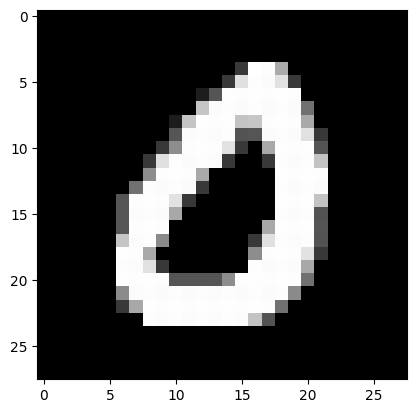

Prediction:  [0]
Label:  9


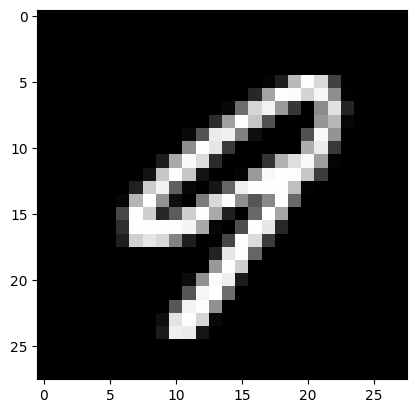

Prediction:  [0]
Label:  4


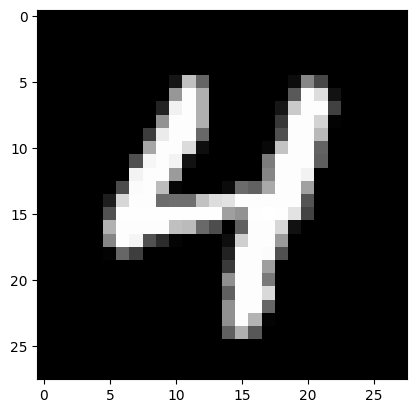

Prediction:  [0]
Label:  2


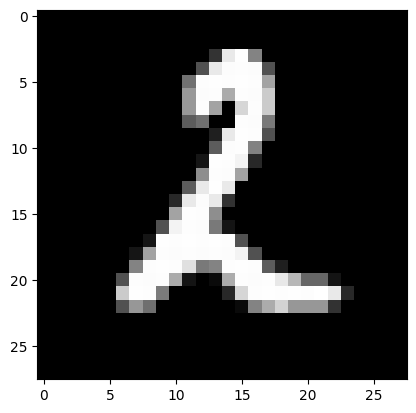

In [24]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [25]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.091